In [1]:
import numpy as np

In [277]:
from PIL import Image,ImageDraw,ImageFont

In [2]:
from libtiff import TIFF

In [3]:
import matplotlib.pyplot as plt

In [4]:
from scipy import misc

In [5]:
import matplotlib.colors as colors

In [6]:
from IPython.display import HTML
import matplotlib.animation as animation

In [7]:
from matplotlib.animation import FFMpegWriter

下面是文件读取器部分,读取一堆tif文件，得到一个图片数组列表

In [8]:
import re

In [517]:
def read_tiff_series(start_file_name,numbers):   #######这个函数要求文件名为字母+数字格式,可直接读取衍射图文件
    tif_list=[]
    image_list=[]
    head_pattern=re.compile('[a-zA-Z]+\.')
    head=head_pattern.match(start_file_name).group()
    tail=re.findall(r'[\d]+',start_file_name)[-1]
    for i in range(numbers):
        tif_list.append(TIFF.open(head+str(i+int(tail)).zfill(4),mode='r'))  ####数字后缀补0，凑足四位
        image_list.append(tif_list[i].read_image())
    return image_list                                ######返回一个列表，元素为图片的numpy.ndarray

文件读取部分结束,下面将图片数组列表中加入设定的字体

In [496]:
def get_img_list_with_text(img_list):
    font_type=ImageFont.truetype('arial',size=180)   ####设定字体类型，大小
    img_list_add_text=[]
    for i in range(len(img_list)):
        img=Image.fromarray(img_list[i].astype('uint16')).convert('RGB')###将图片数组读入pillow的Image中
        draw=ImageDraw.Draw(img)
        draw.text(xy=(50,50),text='the '+str(i)+' one',fill=(255,69,0),font=font_type)###设定加入字体内容，位置
        img_out=np.array(img)                                      ####重新将pillow的Image对象读回numpy中
        txt_cdnt=np.argwhere(img_out[:,:,0]!=img_out[:,:,1])    #####寻找加入字体的坐标
        img_list[i][txt_cdnt[:,0],txt_cdnt[:,1]]=40000         #####将图片数组该坐标处设定为某一特定值
        img_list_add_text.append(img_list[i])
    return img_list_add_text              #####返回加入字体后的数组图片

下面是得到动画部分。输入一个图片数组列表，得到一个动画文件

In [499]:
def img_list_to_mov(img_list,file_name):
    fig = plt.figure()
    
    mov=[]
    for i in range(len(img_list)):
        im=plt.imshow(img_list[i],norm=colors.LogNorm(vmin=10,vmax=10000),cmap='bwr',animated=True)###norm里面的参数可以修改
        mov.append([im])

    ani = animation.ArtistAnimation(fig, mov, interval=500, blit=True, repeat_delay=1000)  ####这里面的参数也可以修改
    HTML(ani.to_jshtml())   ####这行代码用来在网页中播放视频，仅直接调用这个函数的时候在网页中不显示
    #下面这行用来保存文件，fps参数可以修改
    ani.save(file_name,fps=1)#其它参数，好像可以没有,extra_args=['-vcodec', 'libx264'])

In [518]:
img_list=read_tiff_series('movies.0001',5)

In [519]:
img_with_text=get_img_list_with_text(img_list)

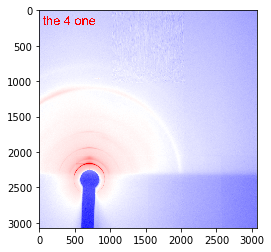

In [520]:
img_list_to_mov(img_with_text,'final_2.mp4')

下面是测试用的代码，与主程序无关

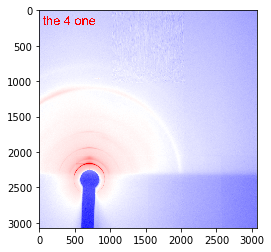

In [493]:
%matplotlib inline
import pylab as pl
from IPython import display
fig = plt.figure()
mov=[]
for i in range(len(img_list_add_text)):

    im=plt.imshow(img_list_add_text[i],norm=colors.LogNorm(vmin=10,vmax=10000),cmap='bwr',animated=True)

    mov.append([im])
    
ani = animation.ArtistAnimation(fig, mov, interval=500, blit=True,
                                repeat_delay=1000)
HTML(ani.to_jshtml())

In [537]:
a=plt.imread('movies.0002')   ###奇怪的是唯独这张图片读不了

OSError: image file is truncated (3584 bytes not processed)